In [1]:
#Class imbalance: when one class has higher %
#handle class imbalance problem: 
 # 1 upsampling
 # 2 downsampling
 # 3 SMOTE

In [2]:
import numpy as np
import pandas as pd

np.random.seed(1) # for reproducibility
no_samples=1000
class_0_ratio=0.9
no_class_0=int(no_samples*class_0_ratio)
no_class_1=no_samples-no_class_0

In [3]:
no_class_0,no_class_1

(900, 100)

In [4]:
0*10

0

In [5]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
np.random.normal(0,1,5)  # Draw random samples from a normal (Gaussian) distribution(mean 0 and std deviation 1)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])

In [7]:
class_0={'feature1': np.random.normal(0,1,no_class_0),
         'feature2': np.random.normal(0,1,no_class_0),
         'target': [0]*no_class_0}

In [8]:
class_0=pd.DataFrame(class_0)

In [9]:
class_0

,feature1,feature2,target
0,-2.301539,-0.832395,0
1,1.744812,1.923815,0
2,-0.761207,-0.605981,0
3,0.319039,1.803589,0
4,-0.249370,-0.452525,0
...,...,...,...
895,-0.446699,-1.307971,0
896,0.204377,1.472396,0
897,0.612233,0.074876,0
898,0.744885,-1.786935,0


In [10]:
class_1=pd.DataFrame({'feature1': np.random.normal(3,1,no_class_1),
         'feature2': np.random.normal(3,1,no_class_1),
         'target': [1]*no_class_1})

In [11]:
class_1

,feature1,feature2,target
0,3.976296,3.440235,1
1,2.303972,3.895921,1
2,4.937132,1.893221,1
3,4.349228,2.037337,1
4,1.724886,1.748043,1
...,...,...,...
95,3.933630,3.489517,1
96,1.236225,3.238796,1
97,2.589783,2.551888,1
98,2.546333,2.389205,1


In [12]:
pd.concat([class_0, class_1])

,feature1,feature2,target
0,-2.301539,-0.832395,0
1,1.744812,1.923815,0
2,-0.761207,-0.605981,0
3,0.319039,1.803589,0
4,-0.249370,-0.452525,0
...,...,...,...
95,3.933630,3.489517,1
96,1.236225,3.238796,1
97,2.589783,2.551888,1
98,2.546333,2.389205,1


In [13]:
df=pd.concat([class_0, class_1]).reset_index(drop=True)

In [14]:
df

,feature1,feature2,target
0,-2.301539,-0.832395,0
1,1.744812,1.923815,0
2,-0.761207,-0.605981,0
3,0.319039,1.803589,0
4,-0.249370,-0.452525,0
...,...,...,...
995,3.933630,3.489517,1
996,1.236225,3.238796,1
997,2.589783,2.551888,1
998,2.546333,2.389205,1


In [15]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [16]:
# Upsampling

df_minority=df[df.target==1]
df_majority=df[df.target==0]

In [17]:
df_minority

,feature1,feature2,target
900,3.976296,3.440235,1
901,2.303972,3.895921,1
902,4.937132,1.893221,1
903,4.349228,2.037337,1
904,1.724886,1.748043,1
...,...,...,...
995,3.933630,3.489517,1
996,1.236225,3.238796,1
997,2.589783,2.551888,1
998,2.546333,2.389205,1


In [18]:
df_majority

,feature1,feature2,target
0,-2.301539,-0.832395,0
1,1.744812,1.923815,0
2,-0.761207,-0.605981,0
3,0.319039,1.803589,0
4,-0.249370,-0.452525,0
...,...,...,...
895,-0.446699,-1.307971,0
896,0.204377,1.472396,0
897,0.612233,0.074876,0
898,0.744885,-1.786935,0


In [19]:
from sklearn.utils import resample

In [20]:
df_minority_upsampled=resample(df_minority, replace=True, n_samples=len(df_majority), random_state=1) #replace=True means with replacement (can repeat the element)
                                                                                                      # random state=1 it means always generate same data when execute again and again

In [21]:
df_minority_upsampled

,feature1,feature2,target
937,3.225189,0.800942,1
912,3.692689,3.941326,1
972,4.423177,1.675751,1
909,2.555005,2.036343,1
975,3.750375,2.868294,1
...,...,...,...
936,3.265930,1.612522,1
998,2.546333,2.389205,1
901,2.303972,3.895921,1
932,2.253776,1.681477,1


In [22]:
df_minority_upsampled.shape

(900, 3)

In [23]:
df_minority_upsampled.head()

,feature1,feature2,target
937,3.225189,0.800942,1
912,3.692689,3.941326,1
972,4.423177,1.675751,1
909,2.555005,2.036343,1
975,3.750375,2.868294,1


In [24]:
df_upsampled=pd.concat([df_majority, df_minority_upsampled])

In [25]:
df_upsampled

,feature1,feature2,target
0,-2.301539,-0.832395,0
1,1.744812,1.923815,0
2,-0.761207,-0.605981,0
3,0.319039,1.803589,0
4,-0.249370,-0.452525,0
...,...,...,...
936,3.265930,1.612522,1
998,2.546333,2.389205,1
901,2.303972,3.895921,1
932,2.253776,1.681477,1


In [26]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [27]:
# down sampling

In [28]:
df_minority

,feature1,feature2,target
900,3.976296,3.440235,1
901,2.303972,3.895921,1
902,4.937132,1.893221,1
903,4.349228,2.037337,1
904,1.724886,1.748043,1
...,...,...,...
995,3.933630,3.489517,1
996,1.236225,3.238796,1
997,2.589783,2.551888,1
998,2.546333,2.389205,1


In [29]:
df_majority

,feature1,feature2,target
0,-2.301539,-0.832395,0
1,1.744812,1.923815,0
2,-0.761207,-0.605981,0
3,0.319039,1.803589,0
4,-0.249370,-0.452525,0
...,...,...,...
895,-0.446699,-1.307971,0
896,0.204377,1.472396,0
897,0.612233,0.074876,0
898,0.744885,-1.786935,0


In [30]:
df_majority_downsampled=resample(df_majority, replace=False, n_samples=len(df_minority), random_state=1)

In [31]:
df_majority_downsampled

,feature1,feature2,target
860,-0.369256,0.963905,0
880,-0.364538,0.637025,0
874,0.778174,0.951382,0
780,-1.940681,0.001055,0
525,1.620912,-1.322443,0
...,...,...,...
494,-0.017718,-0.231485,0
255,0.106223,-0.815547,0
672,-0.019232,-1.535752,0
481,1.197831,-0.725323,0


In [32]:
df_downsampled=pd.concat([df_minority, df_majority_downsampled])

In [33]:
df_downsampled

,feature1,feature2,target
900,3.976296,3.440235,1
901,2.303972,3.895921,1
902,4.937132,1.893221,1
903,4.349228,2.037337,1
904,1.724886,1.748043,1
...,...,...,...
494,-0.017718,-0.231485,0
255,0.106223,-0.815547,0
672,-0.019232,-1.535752,0
481,1.197831,-0.725323,0


In [34]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

SMOTE: synthetic minority oversampling technique (CREATE THE SYNTHETIC DATA)

In [35]:
#SMOTE

In [36]:
from sklearn.datasets import make_classification

In [37]:
make_classification(n_samples=10, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.80], random_state=1)

(array([[ 1.31982743,  0.45424796],
        [ 0.10972634,  1.83671408],
        [ 1.20851363,  2.48255914],
        [ 0.59208383,  1.24974475],
        [ 1.78689446,  2.3841826 ],
        [ 0.94785273,  3.53015683],
        [ 1.08876018,  1.35925144],
        [ 0.42774158,  3.54015499],
        [-0.88398194, -0.57876171],
        [ 0.44541961,  1.78143334]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))

In [38]:
X,y=make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=1)
#n_redundant=0 (redundant feature=0)

In [39]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [40]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
len(y[y==1])  # not exacty 90 % but close

106

In [43]:
len(y[y==0])

894

In [44]:
df1=pd.DataFrame(X, columns=['f1', 'f2'])

In [46]:
df2=pd.DataFrame(y, columns=['target'])

In [47]:
df1

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
995,2.210439,2.006772
996,1.910941,2.011860
997,-0.556625,-0.159837
998,1.004999,0.936290


In [48]:
df2

,target
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [51]:
final_df=pd.concat([df1, df2], axis=1)

In [52]:
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [53]:
final_df.target.value_counts()

target
0    894
1    106
Name: count, dtype: int64

In [54]:
import matplotlib.pyplot as plt

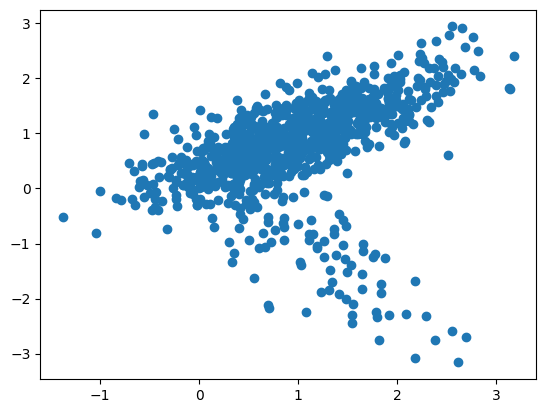

In [55]:
plt.scatter(final_df['f1'], final_df['f2'])

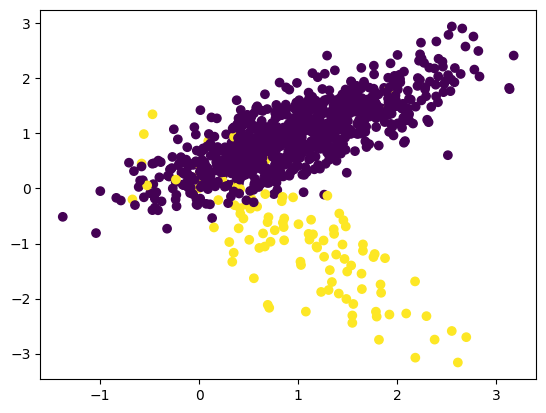

In [56]:
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [57]:
pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.3 kB 640.0 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 777.7 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 744.7 kB/s eta 0:00:01
   ------------------- ------------------ 133.1/258.3 kB 782.7 kB/s eta 0:00:01
   --------------------------------- ---- 225.3/258.3 kB 981.9 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 923.9 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 932.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\91830\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [58]:
from imblearn.over_sampling import SMOTE

In [63]:
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [64]:
X.shape

(1788, 2)

In [65]:
y.shape

(1788,)

In [67]:
len(y[y==0])

894

In [68]:
len(y[y==1])

894

In [72]:
df1=pd.DataFrame(X,columns=['f1', 'f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1, df2], axis=1)

In [73]:
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.863904,-0.214036,1
1784,0.492897,-1.119604,1
1785,0.402162,0.000511,1
1786,1.552800,-2.216041,1


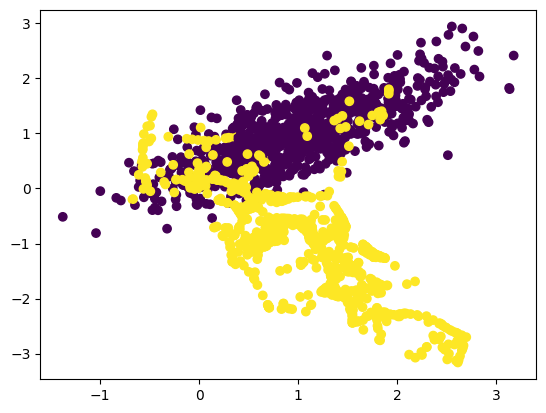

In [71]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])

In [74]:
oversample_df[oversample_df.target==1]

,f1,f2,target
0,1.536830,-1.398694,1
8,2.552644,-2.588927,1
14,1.115618,-0.929017,1
17,1.558391,-2.098504,1
20,-0.672512,-0.198716,1
...,...,...,...
1783,0.863904,-0.214036,1
1784,0.492897,-1.119604,1
1785,0.402162,0.000511,1
1786,1.552800,-2.216041,1
